<a href="https://colab.research.google.com/github/tutalae/TensorFlow/blob/main/practice_tensorflow_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
# create tensor constant
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# check number of dimension
scalar.ndim

0

In [ ]:
# create vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# check number of dimension
vector.ndim

1

In [ ]:
# create matrix
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
# check number of dimension
matrix.ndim

2

In [ ]:
# create another matrix
another_matrix = tf.constant([[10, 7],
                      [7, 10],
                      [10, 7]], dtype=tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 7., 10.],
       [10.,  7.]], dtype=float16)>

In [ ]:
# create tf.variable
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# changeable_tensor[0] = 7

In [ ]:
# try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
 # create random tensor
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3, 2)) # normal distrubution
random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [ ]:
 # create random tensor
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))
random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [ ]:
# shuffle the order of elements in a tensor
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [5, 6]])

# shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled, seed = 42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 5,  6],
       [ 3,  4],
       [10,  7]], dtype=int32)>

In [ ]:
# create a tensor of all ones
tf.ones([3, 2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# create a tensor of all zeros
tf.zeros(shape = [3, 2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [ ]:
# turn numpy to tensor
# tensor can run on gpu different from numpy

import numpy as np
numpy_a = np.arange(1, 25, dtype = np.float)
numpy_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [ ]:
A= tf.constant(numpy_a)
A

<tf.Tensor: shape=(24,), dtype=float64, numpy=
array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])>

In [ ]:
A_change_shape = tf.constant(numpy_a, shape = (3, 2, 4))
A_change_shape

<tf.Tensor: shape=(3, 2, 4), dtype=float64, numpy=
array([[[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.]],

       [[ 9., 10., 11., 12.],
        [13., 14., 15., 16.]],

       [[17., 18., 19., 20.],
        [21., 22., 23., 24.]]])>

In [ ]:
A_change_shape.ndim

3

In [ ]:
add_axis_tensor = A_change_shape[..., tf.newaxis]
add_axis_tensor

<tf.Tensor: shape=(3, 2, 4, 1), dtype=float64, numpy=
array([[[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.]],

        [[ 5.],
         [ 6.],
         [ 7.],
         [ 8.]]],


       [[[ 9.],
         [10.],
         [11.],
         [12.]],

        [[13.],
         [14.],
         [15.],
         [16.]]],


       [[[17.],
         [18.],
         [19.],
         [20.]],

        [[21.],
         [22.],
         [23.],
         [24.]]]])>

In [ ]:
tf.expand_dims(A_change_shape, axis = -1)

<tf.Tensor: shape=(3, 2, 4, 1), dtype=float64, numpy=
array([[[[ 1.],
         [ 2.],
         [ 3.],
         [ 4.]],

        [[ 5.],
         [ 6.],
         [ 7.],
         [ 8.]]],


       [[[ 9.],
         [10.],
         [11.],
         [12.]],

        [[13.],
         [14.],
         [15.],
         [16.]]],


       [[[17.],
         [18.],
         [19.],
         [20.]],

        [[21.],
         [22.],
         [23.],
         [24.]]]])>

In [ ]:
tf.expand_dims(A_change_shape, axis = 0)

<tf.Tensor: shape=(1, 3, 2, 4), dtype=float64, numpy=
array([[[[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.]],

        [[ 9., 10., 11., 12.],
         [13., 14., 15., 16.]],

        [[17., 18., 19., 20.],
         [21., 22., 23., 24.]]]])>

In [ ]:
# basix operation
# +, -, *, /

In [ ]:
tensor = tf.constant([[3, 2], [2,  3]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[13, 12],
       [12, 13]], dtype=int32)>

In [ ]:
tensor # tensor is unchanged

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3, 2],
       [2, 3]], dtype=int32)>

In [ ]:
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[-7, -8],
       [-8, -7]], dtype=int32)>

In [ ]:
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[30, 20],
       [20, 30]], dtype=int32)>

In [ ]:
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[30, 20],
       [20, 30]], dtype=int32)>

In [ ]:
tensor / 10

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.3, 0.2],
       [0.2, 0.3]])>

In [ ]:
tensor2 = tensor + 1
tensor2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[4, 3],
       [3, 4]], dtype=int32)>

In [ ]:
tensor + tensor2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[7, 5],
       [5, 7]], dtype=int32)>

In [ ]:
tensor - tensor2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[-1, -1],
       [-1, -1]], dtype=int32)>

In [ ]:
tensor / tensor2

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.75      , 0.66666667],
       [0.66666667, 0.75      ]])>

In [ ]:
tensor * tensor2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[12,  6],
       [ 6, 12]], dtype=int32)>

In [ ]:
# dot product
tf.matmul(tensor,  tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[13, 12],
       [12, 13]], dtype=int32)>

In [ ]:
numpy_b = np.arange(0, 12)
b_change_shape = tf.constant(numpy_b, shape = (4, 3))
b_change_shape

<tf.Tensor: shape=(4, 3), dtype=int64, numpy=
array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])>

In [ ]:
c_change_shape = tf.constant(numpy_b, shape = (3, 4))
c_change_shape

<tf.Tensor: shape=(3, 4), dtype=int64, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])>

In [ ]:
 b_change_shape @ c_change_shape

<tf.Tensor: shape=(4, 4), dtype=int64, numpy=
array([[ 20,  23,  26,  29],
       [ 56,  68,  80,  92],
       [ 92, 113, 134, 155],
       [128, 158, 188, 218]])>

In [ ]:
c_change_shape @ b_change_shape

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])>

In [ ]:
d_change_shape = tf.constant(numpy_b, shape = (6, 2))
d_change_shape

<tf.Tensor: shape=(6, 2), dtype=int64, numpy=
array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])>

In [ ]:
# c_change_shape @ d_change_shape
# this will error

In [ ]:
tf.transpose(d_change_shape)

<tf.Tensor: shape=(2, 6), dtype=int64, numpy=
array([[ 0,  2,  4,  6,  8, 10],
       [ 1,  3,  5,  7,  9, 11]])>

In [ ]:
# create tensor
B = tf.constant([1.2, 2.3])
B.dtype

tf.float32

In [ ]:
C = tf.cast(tf.constant([1, 2]), 'float32')
C.dtype

tf.float32

In [ ]:
D = B + C
D.dtype

tf.float32

In [ ]:
# tf.cast
C = tf.cast(B, dtype = tf.float32)
C.dtype

D = B + C
D.dtype

tf.float32

In [ ]:
## aggregating tensors

In [ ]:
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.4, 4.6], dtype=float32)>

In [ ]:
tf.reduce_max(D)

<tf.Tensor: shape=(), dtype=float32, numpy=4.6>

In [ ]:
tf.reduce_min(D)

<tf.Tensor: shape=(), dtype=float32, numpy=2.4>

In [ ]:
tf.reduce_mean(D)

<tf.Tensor: shape=(), dtype=float32, numpy=3.5>

In [ ]:
tf.reduce_sum(D)

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [ ]:
import tensorflow_probability as tfp

In [ ]:
tfp.stats.variance(D)

<tf.Tensor: shape=(), dtype=float32, numpy=1.2099998>

In [ ]:
tfp.stats.stddev(D)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0999999>

In [ ]:
# find position maximum and minmimum

F = tf.random.uniform(shape = [50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.4127456 , 0.9363905 , 0.02204847, 0.04000115, 0.84620595,
       0.9385079 , 0.8039175 , 0.3377236 , 0.37759602, 0.73144937,
       0.05840945, 0.22254062, 0.9470805 , 0.9227648 , 0.40122652,
       0.14863884, 0.29406834, 0.35583198, 0.07761967, 0.4382168 ,
       0.69551   , 0.87623143, 0.9341972 , 0.3478316 , 0.9185227 ,
       0.9322965 , 0.97032034, 0.98181915, 0.55577636, 0.52298903,
       0.4399842 , 0.2037499 , 0.6091291 , 0.94754493, 0.42059815,
       0.23270822, 0.9334092 , 0.63727164, 0.41494858, 0.387334  ,
       0.53326154, 0.15559351, 0.12673903, 0.10871267, 0.9586444 ,
       0.2808038 , 0.5358665 , 0.05488837, 0.2558831 , 0.11552405],
      dtype=float32)>

In [ ]:
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=27>

In [ ]:
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.98181915>

In [ ]:
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [ ]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.022048473>

In [ ]:
## one-hot
some_list = [0, 1, 2, 3]
depth = 4

# one hot encode out list
tf.one_hot(some_list, depth)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
tf.one_hot(some_list, depth, on_value = 2, off_value = 4)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[2, 4, 4, 4],
       [4, 2, 4, 4],
       [4, 4, 2, 4],
       [4, 4, 4, 2]], dtype=int32)>

In [ ]:
numpy_a = np.arange(1, 25, dtype = np.float)
numpy_a = numpy_a**2
numpy_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100., 121.,
       144., 169., 196., 225., 256., 289., 324., 361., 400., 441., 484.,
       529., 576.])

In [ ]:
tensor_a = tf.constant(numpy_a, shape = (4, 6))
tensor_a

<tf.Tensor: shape=(4, 6), dtype=float64, numpy=
array([[  1.,   4.,   9.,  16.,  25.,  36.],
       [ 49.,  64.,  81., 100., 121., 144.],
       [169., 196., 225., 256., 289., 324.],
       [361., 400., 441., 484., 529., 576.]])>

In [ ]:
# square root
tf.sqrt(tensor_a)

<tf.Tensor: shape=(4, 6), dtype=float64, numpy=
array([[ 1.,  2.,  3.,  4.,  5.,  6.],
       [ 7.,  8.,  9., 10., 11., 12.],
       [13., 14., 15., 16., 17., 18.],
       [19., 20., 21., 22., 23., 24.]])>

In [ ]:
# square root
tf.math.log(tensor_a)

<tf.Tensor: shape=(4, 6), dtype=float64, numpy=
array([[0.        , 1.38629436, 2.19722458, 2.77258872, 3.21887582,
        3.58351894],
       [3.8918203 , 4.15888308, 4.39444915, 4.60517019, 4.79579055,
        4.9698133 ],
       [5.12989871, 5.27811466, 5.4161004 , 5.54517744, 5.66642669,
        5.78074352],
       [5.88887796, 5.99146455, 6.08904488, 6.18208491, 6.27098843,
        6.35610766]])>

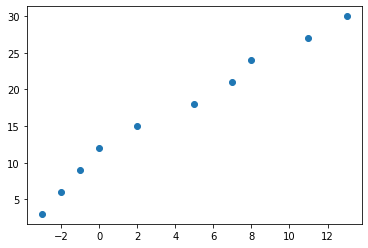

In [ ]:
# regression

import matplotlib.pyplot as plt

# create features
X = np.array([-3, -2, -1, 0, 2, 5, 7, 8, 11, 13])

y = np.array([3, 6, 9, 12, 15, 18, 21, 24, 27, 30])

# visualize 
plt.scatter(X,y)

In [ ]:
# create a demo tensor

In [ ]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [102]:
# turn Numpy array of tensors
X =tf.constant(X, dtype = 'float32')
y =tf.constant(y, dtype = 'float32')
X, y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([-3., -2., -1.,  0.,  2.,  5.,  7.,  8., 11., 13.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.], dtype=float32)>)

In [ ]:
X.ndim, y.ndim

(1, 1)

In [ ]:
# modeling

# 1. create model - input, output, hidden layer
# 2. compiling model - define loss function, optimizer, evaluation
# 3. fitting model

In [ ]:
Model = tf.keras.Sequential()
Model.add(tf.keras.layers.Dense(1, input_shape=(1,)))
Model.add(tf.keras.layers.Dense(1))
Model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
Model.metrics_names

Model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 907ms/step - loss: 510.2520 - mae: 19.0976
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 509.6561 - mae: 19.0880
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 509.0612 - mae: 19.0785
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 508.4673 - mae: 19.0690
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 507.8745 - mae: 19.0595


In [ ]:
# make a predictio
Model.predict([17.0])

array([[-10.874915]], dtype=float32)

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,))
outputs = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])
model.metrics_names

model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 958ms/step - loss: 683.0703 - mae: 21.4827
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 682.6962 - mae: 21.4773
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 682.3221 - mae: 21.4719
Epoch 4/5
1/1 [==============================] - 0s 23ms/step - loss: 681.9482 - mae: 21.4665
Epoch 5/5
1/1 [==============================] - 0s 22ms/step - loss: 681.5746 - mae: 21.4611


In [ ]:
 X, y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([-3., -2., -1.,  0.,  2.,  5.,  7.,  8., 11., 13.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.], dtype=float32)>)

In [ ]:
# make a predictio
model.predict([17.0])

array([[-20.54155]], dtype=float32)

In [ ]:
# improve model
# 1. create model - add more layers, activation function
# 2. compiling a model - change optimization, learning rate
# 3. fitt a model - more epoch, more data

In [113]:
x = np.random.random((2, 3))
y = np.random.randint(0, 2, (2, 2))

In [124]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(2))
model.compile(optimizer='sgd', loss='mse')
# This builds the model for the first time:
model.fit(x, y, batch_size=32, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 331ms/step - loss: 0.9933
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 0.9608
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.9174
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 0.8760
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.8364
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7986
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7625
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7279
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6949
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6633


In [125]:
x

array([[0.00934324, 0.0970159 , 0.68987502],
       [0.32989649, 0.29518028, 0.05762273]])

In [120]:
model.predict([[0., 0. , 0.],
       [0., 0., 0.]])

array([[0.2575913 , 0.21213455],
       [0.2575913 , 0.21213455]], dtype=float32)

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [128]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd

print(tf.__version__)

2.8.2


In [129]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [130]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [131]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [132]:
dataset = dataset.dropna()

In [133]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [134]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [135]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

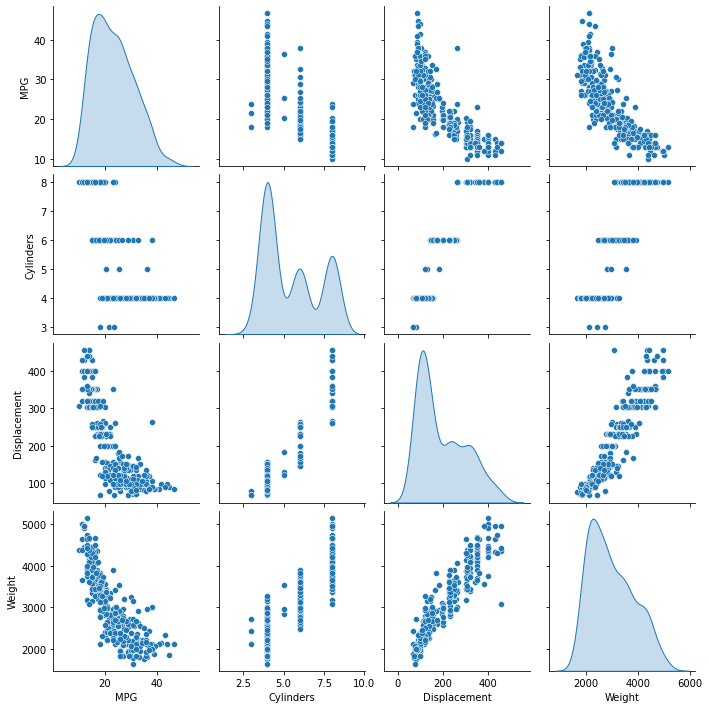

In [138]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [139]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [140]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [141]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [142]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [143]:
normalizer.adapt(np.array(train_features))

In [144]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [145]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [146]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [147]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_65 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [148]:
horsepower_model.predict(horsepower[:10])

array([[ 1.231],
       [ 0.695],
       [-2.271],
       [ 1.725],
       [ 1.56 ],
       [ 0.613],
       [ 1.849],
       [ 1.56 ],
       [ 0.407],
       [ 0.695]], dtype=float32)

In [149]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [150]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.9 s, sys: 156 ms, total: 4.06 s
Wall time: 4.03 s


In [151]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.803328,4.194718,95
96,3.803520,4.188137,96
97,3.804365,4.192554,97
98,3.801913,4.188379,98
99,3.804897,4.186894,99


In [152]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

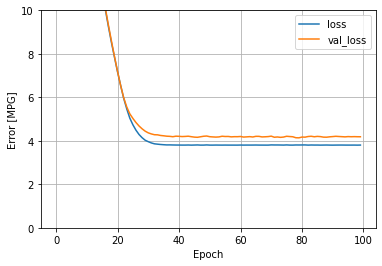

In [153]:
plot_loss(history)

In [154]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [155]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [156]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

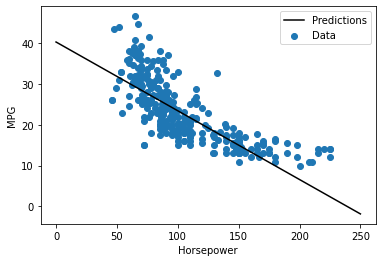

In [157]:
plot_horsepower(x, y)

In [158]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [159]:
linear_model.predict(train_features[:10])

array([[-0.714],
       [-0.716],
       [ 1.205],
       [-1.07 ],
       [-0.084],
       [-0.406],
       [-0.244],
       [-1.194],
       [-0.145],
       [ 0.276]], dtype=float32)

In [160]:
linear_model.layers[1].kernel

<tf.Variable 'dense_66/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.417],
       [-0.404],
       [ 0.402],
       [ 0.343],
       [-0.158],
       [-0.073],
       [-0.474],
       [-0.033],
       [-0.549]], dtype=float32)>

In [161]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [162]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.33 s, sys: 156 ms, total: 4.48 s
Wall time: 4.49 s


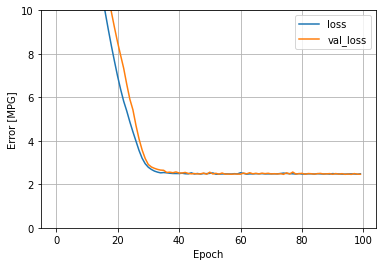

In [163]:
plot_loss(history)

In [164]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [165]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [166]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [167]:
dnn_horsepower_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_67 (Dense)            (None, 64)                128       
                                                                 
 dense_68 (Dense)            (None, 64)                4160      
                                                                 
 dense_69 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [168]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.63 s, sys: 194 ms, total: 4.82 s
Wall time: 5.89 s


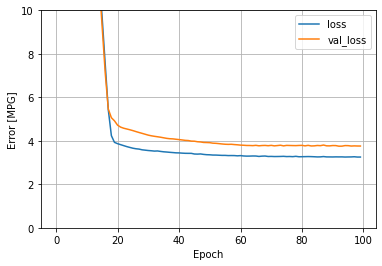

In [169]:
plot_loss(history)

In [170]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

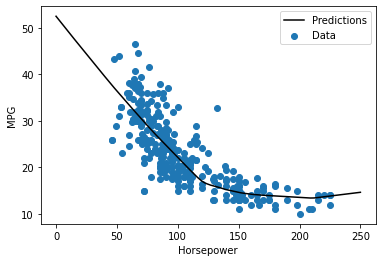

In [171]:
plot_horsepower(x, y)

In [172]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [173]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_70 (Dense)            (None, 64)                640       
                                                                 
 dense_71 (Dense)            (None, 64)                4160      
                                                                 
 dense_72 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [174]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.59 s, sys: 217 ms, total: 4.8 s
Wall time: 5.82 s


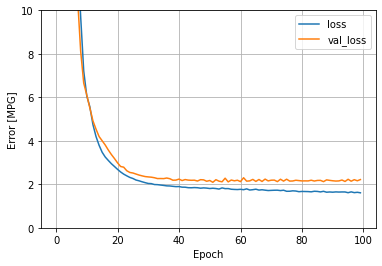

In [175]:
plot_loss(history)

In [176]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [177]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.634137
linear_model,2.492479
dnn_horsepower_model,2.894566
dnn_model,1.782884


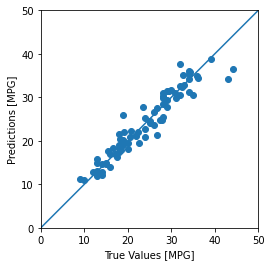

In [178]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

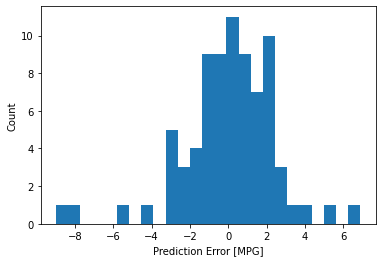

In [179]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [182]:
dnn_model.save('dnn_model')

In [183]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [184]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.634137
linear_model,2.492479
dnn_horsepower_model,2.894566
dnn_model,1.782884
reloaded,1.782884
